In [1]:
%matplotlib inline
%load_ext memory_profiler

import pandas as pd
import os
import glob
import pickle
import phate
import scprep
import meld
import graphtools as gt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import scanpy as sc
from sklearn.decomposition import PCA
import math
from scipy import sparse
import sys
sys.path.append('/home/ngr4/project/scripts/')
import utils
import magic

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
sc.set_figure_params(dpi=300,dpi_save=600,
                     frameon=False,
                     fontsize=9)
plt.rcParams['savefig.dpi']=600
sc.settings.verbosity=2
sc._settings.ScanpyConfig.n_jobs=-1
sns.set_style("ticks")



In [2]:
pdfp = '/home/ngr4/project/scnd/data/processed'
pfp = '/home/ngr4/project/scnd/results/'

%memit adata = utils.load_adata(os.path.join(pdfp,'mouse_200614.h5ad'))

loaded @200706.12:07:11
took 20.82-s to load data
peak memory: 10803.20 MiB, increment: 10605.59 MiB


In [4]:
print('Starting imputation for {}\n'.format('WT'))
tic = time.time()

wt = adata[adata.obs['genotype']=='WT', :]
wt.obs['value'] = 0
sc.pp.pca(wt)
sc.pp.neighbors(wt, n_pcs=50)


# MAGIC
G = gt.Graph(data=wt.obsp['connectivities']+sparse.diags([1]*wt.shape[0],format='csr'),
             precomputed='adjacency',
             use_pygsp=True)
G.knn_max = None

# MAGIC
magic_op=magic.MAGIC().fit(X=wt.X,graph=G) # running fit_transform produces wrong shape
wt.layers['imputed']=magic_op.transform(wt.X,genes='all_genes')

print('\n  imputation in {:.2f}-min'.format((time.time() - tic)/60))

print('\n Starting imputation for {}\n'.format('SCA1'))
tic = time.time()

mut = adata[adata.obs['genotype']=='SCA1', :]
mut.obs['value'] = 0
sc.pp.pca(mut)
sc.pp.neighbors(mut, n_pcs=50)

# MAGIC
G = gt.Graph(data=mut.obsp['connectivities']+sparse.diags([1]*mut.shape[0],format='csr'),
             precomputed='adjacency',
             use_pygsp=True)
G.knn_max = None

# MAGIC
magic_op=magic.MAGIC().fit(X=mut.X,graph=G) # running fit_transform produces wrong shape
mut.layers['imputed']=magic_op.transform(mut.X,genes='all_genes')

print('\n  imputation in {:.2f}-min'.format((time.time() - tic)/60))

    

Starting imputation for WT



Trying to set attribute `.obs` of view, copying.


computing PCA
    with n_comps=50
    finished (0:04:20)
computing neighbors
    using 'X_pca' with n_pcs = 50


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../conda_envs/rnavel/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../con

    finished (0:01:46)
Running MAGIC on 164722 cells and 26374 genes.
Using precomputed graph and diffusion operator...
Running MAGIC with `solver='exact'` on 26374-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:594: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


Calculating imputation...
Calculated imputation in 649.85 seconds.

  imputation in 17.40-min

 Starting imputation for SCA1



Trying to set attribute `.obs` of view, copying.


computing PCA
    with n_comps=50
    finished (0:04:07)
computing neighbors
    using 'X_pca' with n_pcs = 50


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../conda_envs/rnavel/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished (0:01:49)
Running MAGIC on 153590 cells and 26374 genes.
Using precomputed graph and diffusion operator...


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


Running MAGIC with `solver='exact'` on 26374-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
Calculating imputation...
Calculated imputation in 611.05 seconds.

  imputation in 16.61-min


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:594: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


In [7]:
if True: 
    # save
    utils.write_adata(os.path.join(pdfp, 'mouse_wt_imputed.h5ad'), wt)
    utils.write_adata(os.path.join(pdfp, 'mouse_sca1_imputed.h5ad'), mut)

saved @200706.12:44:05
took 36.13-s to save data
saved @200706.12:44:40
took 34.73-s to save data


# PLOT dynamical, all genes

In [3]:
if True:
    # load
    
    pdfp = '/home/ngr4/project/scnd/data/processed'
    pfp = '/home/ngr4/project/scnd/results/'
    wt = utils.load_adata(os.path.join(pdfp, 'mouse_wt_imputed.h5ad'))
    mut = utils.load_adata(os.path.join(pdfp, 'mouse_sca1_imputed.h5ad'))

loaded @200706.16:06:13
took 37.58-s to load data
loaded @200706.16:06:48
took 35.33-s to load data


In [4]:
ctype = 'Purkinje cell'
ntimebins = 20

wt = wt[wt.obs['ctype']==ctype, :]
wt.obs['value'] = 0

mut = mut[mut.obs['ctype']==ctype, :]
mut.obs['value'] = 0


sc.pp.pca(wt)
sc.pp.neighbors(wt, n_pcs=50)
sc.pp.pca(mut)
sc.pp.neighbors(mut, n_pcs=50)

# MELD
G = gt.Graph(data=wt.obsp['connectivities']+sparse.diags([1]*wt.shape[0],format='csr'),
             precomputed='adjacency',
             use_pygsp=True)
G.knn_max = None
wt.obs['res_t']=-1
wt.obs.loc[wt.obs['timepoint']=='12wk', 'res_t'] = -0.5
wt.obs.loc[wt.obs['timepoint']=='18wk', 'res_t'] = 0
wt.obs.loc[wt.obs['timepoint']=='24wk', 'res_t'] = 0.5
wt.obs.loc[wt.obs['timepoint']=='30wk', 'res_t'] = 1
wt.obs['ees_t'] = meld.MELD().fit_transform(G=G,RES=wt.obs['res_t'])
wt.obs['ees_t'] = (wt.obs['ees_t'] - wt.obs['ees_t'].min()) / (wt.obs['ees_t'].max() - wt.obs['ees_t'].min())

G = gt.Graph(data=mut.obsp['connectivities']+sparse.diags([1]*mut.shape[0],format='csr'),
         precomputed='adjacency',
         use_pygsp=True)
G.knn_max = None
mut.obs['res_t']=-1
mut.obs.loc[mut.obs['timepoint']=='12wk', 'res_t'] = -0.5
mut.obs.loc[mut.obs['timepoint']=='18wk', 'res_t'] = 0
mut.obs.loc[mut.obs['timepoint']=='24wk', 'res_t'] = 0.5
mut.obs.loc[mut.obs['timepoint']=='30wk', 'res_t'] = 1
mut.obs['ees_t'] = meld.MELD().fit_transform(G=G,RES=mut.obs['res_t'])
mut.obs['ees_t'] = (mut.obs['ees_t'] - mut.obs['ees_t'].min()) / (mut.obs['ees_t'].max() - mut.obs['ees_t'].min())

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


computing PCA
    with n_comps=50
    finished (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:05)
computing PCA
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)


In [5]:
from scipy.stats import zscore, binned_statistic
sys.setrecursionlimit(10000)


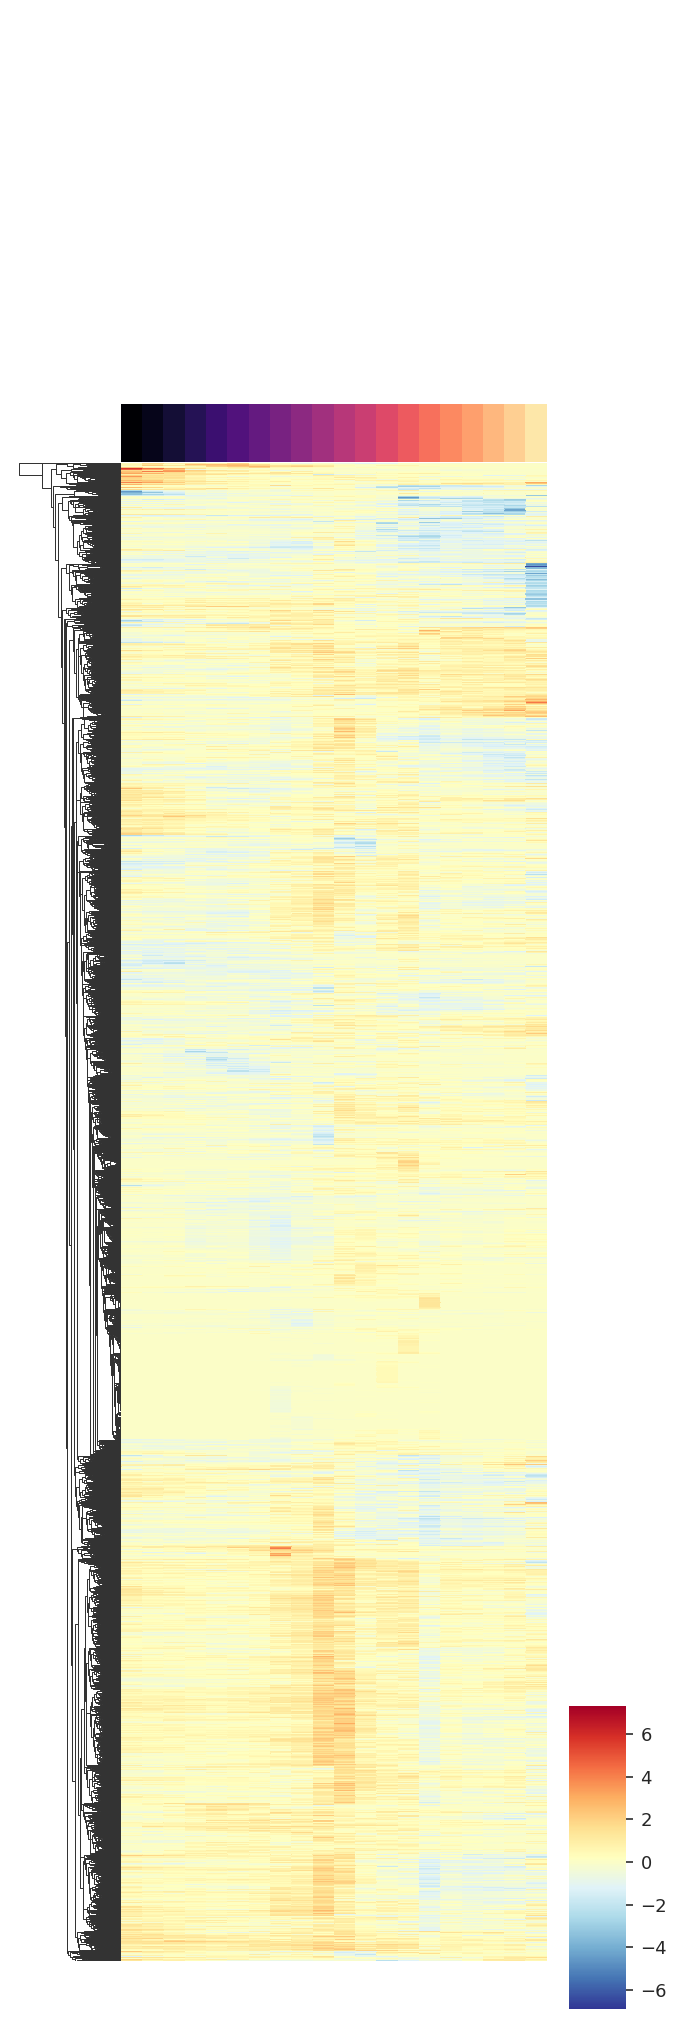

In [8]:
# plot all diff (imputed)
sys.setrecursionlimit(10000)
x = pd.DataFrame(wt.layers['imputed'], 
                 columns=wt.var_names.to_list(),
                 index=wt.obs.index.to_list())
x['ctype'] = wt.obs['ctype'].to_list()
y = pd.DataFrame(mut.layers['imputed'], 
                 columns=mut.var_names.to_list(),
                 index=mut.obs.index.to_list())
y['ctype'] = mut.obs['ctype'].to_list()
x = x.append(y)
del y
x = x.loc[x['ctype']==ctype, :]
x = x.drop(columns='ctype')
x.loc[:, x.columns] = zscore(x.loc[:, x.columns])

# # drop NAs
x = x.dropna(axis=1)

# subset
x_mut = x.loc[mut.obs.index]
x = x.loc[wt.obs.index]


_, _, time_groupings = binned_statistic(np.concatenate((wt.obs['ees_t'].to_numpy(), mut.obs['ees_t'].to_numpy())), 
                                        np.concatenate((wt.obs['ees_t'].to_numpy(), mut.obs['ees_t'].to_numpy())), bins=ntimebins)
x['time_grouping'] = time_groupings[0:wt.shape[0]]
x = x.groupby('time_grouping').mean().T

cm = plt.get_cmap('magma')
timecolors = [cm(1.*i/ntimebins) for i in range(ntimebins)]

# plot same genes in mut
x_mut['time_grouping'] = time_groupings[wt.shape[0]:]
x_mut = x_mut.groupby('time_grouping').mean().T

x_diff  = x_mut.subtract(x) # MUT - WT
p_diff = sns.clustermap(
        x_diff,
        pivot_kws=None,
        method='average',
        metric='euclidean',
        z_score=None,
        standard_scale=None,
        row_cluster=True,
        col_cluster=False,
        row_linkage=None,
        figsize=(4, 14), 
        col_linkage=None,
        row_colors=None,
        col_colors=timecolors,
        mask=None,
        dendrogram_ratio=0.2,
        colors_ratio=0.03,
        cbar_pos=(1, 0, 0.1, 0.15),
        tree_kws=None,
        cmap='RdYlBu_r',
        yticklabels=False,
        xticklabels=False,
#         vmin=-1, vmax=1,
    )
p_diff.ax_heatmap.set_xlabel('')

p_diff.savefig(os.path.join(pfp, 'ALL_genes_DIFF_{}_ctypeNORM_imputed.png'.format(ctype)))

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


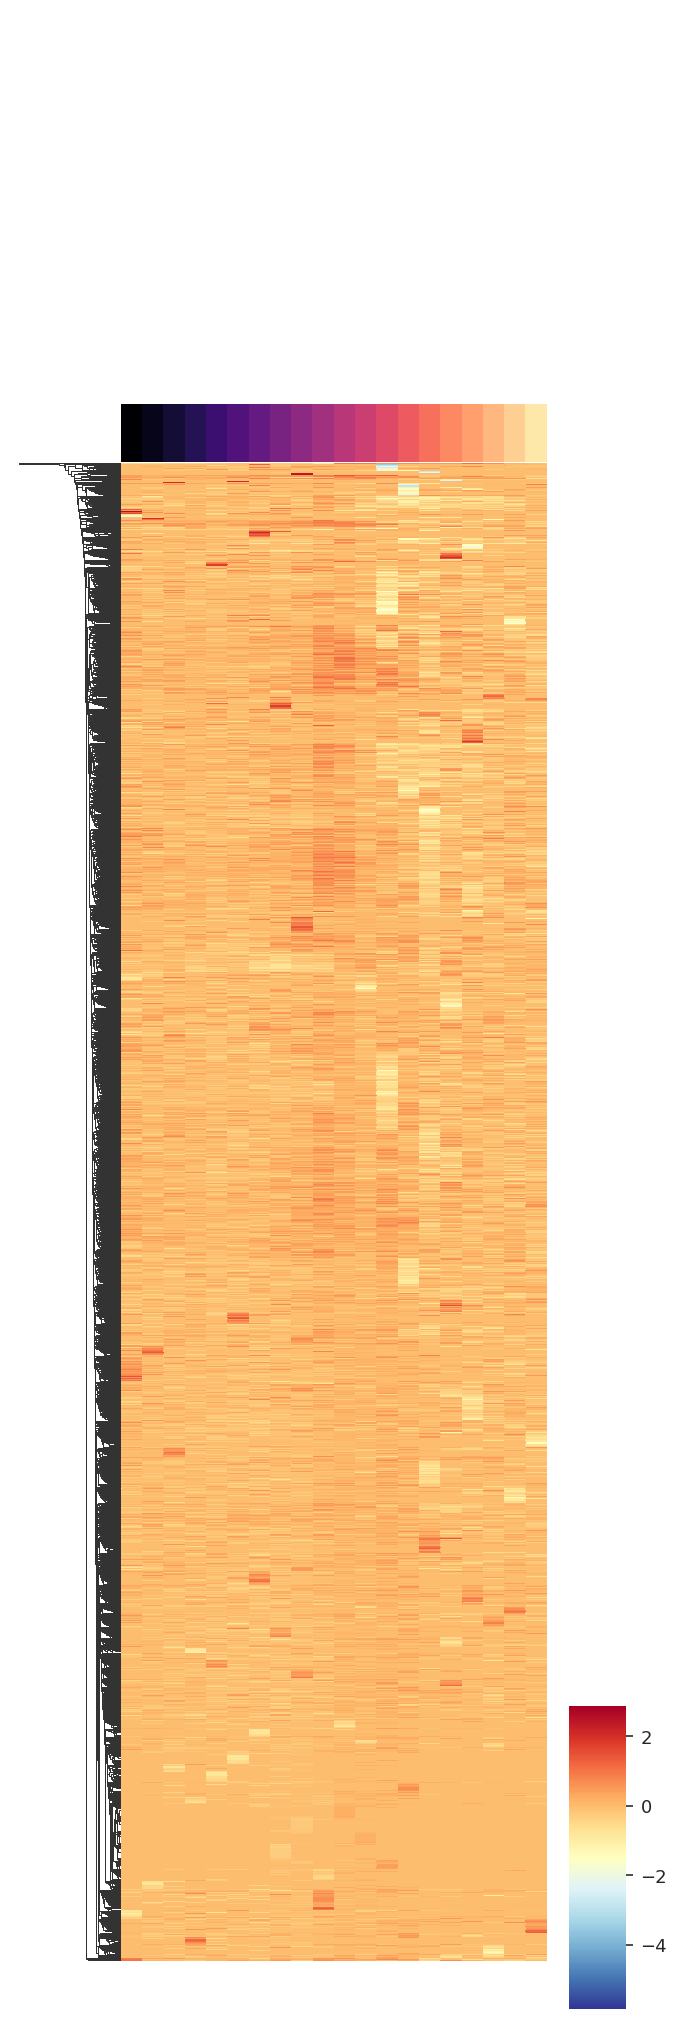

In [9]:
# plot all diff (non-imputed)
sys.setrecursionlimit(10000)
x = pd.DataFrame(wt.X.todense(), 
                 columns=wt.var_names.to_list(),
                 index=wt.obs.index.to_list())
x['ctype'] = wt.obs['ctype'].to_list()
y = pd.DataFrame(mut.X.todense(), 
                 columns=mut.var_names.to_list(),
                 index=mut.obs.index.to_list())
y['ctype'] = mut.obs['ctype'].to_list()
x = x.append(y)
del y
x = x.loc[x['ctype']==ctype, :]
x = x.drop(columns='ctype')
x.loc[:, x.columns] = zscore(x.loc[:, x.columns])

# # drop NAs
x = x.dropna(axis=1)

# subset
x_mut = x.loc[mut.obs.index]
x = x.loc[wt.obs.index]


_, _, time_groupings = binned_statistic(np.concatenate((wt.obs['ees_t'].to_numpy(), mut.obs['ees_t'].to_numpy())), 
                                        np.concatenate((wt.obs['ees_t'].to_numpy(), mut.obs['ees_t'].to_numpy())), bins=ntimebins)
x['time_grouping'] = time_groupings[0:wt.shape[0]]
x = x.groupby('time_grouping').mean().T

cm = plt.get_cmap('magma')
timecolors = [cm(1.*i/ntimebins) for i in range(ntimebins)]

# plot same genes in mut
x_mut['time_grouping'] = time_groupings[wt.shape[0]:]
x_mut = x_mut.groupby('time_grouping').mean().T

x_diff  = x_mut.subtract(x) # MUT - WT
p_diff = sns.clustermap(
        x_diff,
        pivot_kws=None,
        method='average',
        metric='euclidean',
        z_score=None,
        standard_scale=None,
        row_cluster=True,
        col_cluster=False,
        row_linkage=None,
        figsize=(4, 14), 
        col_linkage=None,
        row_colors=None,
        col_colors=timecolors,
        mask=None,
        dendrogram_ratio=0.2,
        colors_ratio=0.03,
        cbar_pos=(1, 0, 0.1, 0.15),
        tree_kws=None,
        cmap='RdYlBu_r',
        yticklabels=False,
        xticklabels=False,
#         vmin=-1, vmax=1,
    )
p_diff.ax_heatmap.set_xlabel('')

p_diff.savefig(os.path.join(pfp, 'ALL_genes_DIFF_{}_ctypeNORM.png'.format(ctype)))

# HUMAN data

In [2]:
pdfp = '/home/ngr4/project/scnd/data/processed'
pfp = '/home/ngr4/project/scnd/results/'

%memit adata = utils.load_adata(os.path.join(pdfp, 'hum_MT_bbknn.h5ad'))


loaded @200716.15:27:06
took 9.88-s to load data
peak memory: 10397.36 MiB, increment: 10209.03 MiB


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [7]:
adata.obs['genotype'] = adata.obs['Sample'].astype(str)
adata.obs.loc[[True if 'CTRL' in i else False for i in adata.obs['Sample']], 'genotype'] = 'WT'
adata.obs.loc[[True if 'SCA' in i else False for i in adata.obs['Sample']], 'genotype'] = 'SCA1'

# clear space
del adata.layers['imputed_bbknn'], adata.obsm['X_pca'], adata.obsp['connectivities'], adata.obsp['distances']

In [13]:
print('Starting imputation for {}\n'.format('WT'))
tic = time.time()

wt = adata[adata.obs['genotype']=='WT', :]
wt.obs['value'] = 0
sc.pp.pca(wt)
sc.pp.neighbors(wt, n_pcs=50)


# MAGIC
G = gt.Graph(data=wt.obsp['connectivities']+sparse.diags([1]*wt.shape[0],format='csr'),
             precomputed='adjacency',
             use_pygsp=True)
G.knn_max = None

# MAGIC
magic_op=magic.MAGIC().fit(X=wt.X,graph=G) # running fit_transform produces wrong shape
wt.layers['imputed']=magic_op.transform(wt.X,genes='all_genes')

print('\n  imputation in {:.2f}-min'.format((time.time() - tic)/60))

print('\n Starting imputation for {}\n'.format('SCA1'))
tic = time.time()

mut = adata[adata.obs['genotype']=='SCA1', :]
mut.obs['value'] = 0
sc.pp.pca(mut)
sc.pp.neighbors(mut, n_pcs=50)

# MAGIC
G = gt.Graph(data=mut.obsp['connectivities']+sparse.diags([1]*mut.shape[0],format='csr'),
             precomputed='adjacency',
             use_pygsp=True)
G.knn_max = None

# MAGIC
magic_op=magic.MAGIC().fit(X=mut.X,graph=G) # running fit_transform produces wrong shape
mut.layers['imputed']=magic_op.transform(mut.X,genes='all_genes')

print('\n  imputation in {:.2f}-min'.format((time.time() - tic)/60))

    

Trying to set attribute `.obs` of view, copying.


Starting imputation for WT

computing PCA
    with n_comps=50
    finished (0:00:52)
computing neighbors
    using 'X_pca' with n_pcs = 50


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../conda_envs/rnavel/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../con

    finished (0:00:10)
Running MAGIC on 16865 cells and 27783 genes.
Using precomputed graph and diffusion operator...
Running MAGIC with `solver='exact'` on 27783-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:594: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


Calculating imputation...
Calculated imputation in 105.73 seconds.


Trying to set attribute `.obs` of view, copying.



  imputation in 2.86-min

 Starting imputation for SCA1

computing PCA
    with n_comps=50
    finished (0:01:10)
computing neighbors
    using 'X_pca' with n_pcs = 50


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../conda_envs/rnavel/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished (0:00:06)
Running MAGIC on 24285 cells and 27783 genes.
Using precomputed graph and diffusion operator...
Running MAGIC with `solver='exact'` on 27783-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/magic/magic.py:594: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


Calculating imputation...
Calculated imputation in 271.66 seconds.

  imputation in 5.87-min


In [14]:
if True: 
    # save
    utils.write_adata(os.path.join(pdfp, 'hum_wt_imputed.h5ad'), wt)
    utils.write_adata(os.path.join(pdfp, 'hum_sca1_imputed.h5ad'), mut)

... storing 'genotype' as categorical
... storing 'genotype' as categorical


saved @200716.15:51:48
took 4.89-s to save data
saved @200716.15:51:54
took 5.99-s to save data
